In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import json

In [2]:
with open(r"C:\Users\MSI\Documents\Proyectos\Datasets\Steam_Data_Games\australian_user_reviews.json",'r', encoding='utf-8') as review:
    lines_review = review.readlines()
list_review = [eval(line.strip()) for line in lines_review]
data_users_review = pd.DataFrame(list_review).drop(columns=['user_url'])

In [3]:
data_users_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  25799 non-null  object
 1   reviews  25799 non-null  object
dtypes: object(2)
memory usage: 403.2+ KB


In [4]:
data_users_review = data_users_review.explode('reviews')

In [5]:
data_users_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59333 entries, 0 to 25798
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  59333 non-null  object
 1   reviews  59305 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [6]:
data_users_review.dropna(inplace=True)

In [7]:
data_users_review

,user_id,reviews
0,76561197970982479,"{'funny': '', 'posted': 'Posted November 5, 20..."
0,76561197970982479,"{'funny': '', 'posted': 'Posted July 15, 2011...."
0,76561197970982479,"{'funny': '', 'posted': 'Posted April 21, 2011..."
1,js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
1,js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...
25797,76561198312638244,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
25797,76561198312638244,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
25798,LydiaMorley,"{'funny': '1 person found this review funny', ..."
25798,LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [8]:
data_users_review.reset_index(drop=True, inplace=True)

In [9]:
data_reviews = pd.DataFrame()
for row in data_users_review.reviews:
    data_reviews = data_reviews._append([row])
data_reviews.head()

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
0,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
0,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...


In [10]:
data_reviews

,funny,posted,last_edited,item_id,helpful,recommend,review
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
0,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
0,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
0,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
0,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...
0,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
0,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
0,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
0,,Posted July 20.,,730,No ratings yet,True,:D


In [11]:
data_reviews.reset_index(drop=True, inplace=True)

In [12]:
data_all_reviews = pd.merge(data_users_review['user_id'], data_reviews,left_index=True,right_index=True, how='inner')

In [13]:
data_all_reviews

,user_id,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...
59300,76561198312638244,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59301,76561198312638244,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59302,LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [14]:
data_all_reviews.drop(columns=['funny','last_edited','helpful'], inplace=True)

In [38]:
data_all_reviews

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
4,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...
59300,76561198312638244,Posted July 10.,70,True,a must have classic from steam definitely wort...
59301,76561198312638244,Posted July 8.,362890,True,this game is a perfect remake of the original ...
59302,LydiaMorley,Posted July 3.,273110,True,had so much fun plaing this and collecting res...
59303,LydiaMorley,Posted July 20.,730,True,:D


In [16]:
with open(r"C:\Users\MSI\Documents\Proyectos\Datasets\Steam_Data_Games\australian_users_items.json", 'r', encoding= 'utf-8') as f:
    lines_items = f.readlines()
    
list_items = [eval(line.strip()) for line in lines_items]
data_users_items = pd.DataFrame(list_items).drop(columns=['user_url','steam_id'])

In [40]:
data_users_items

,user_id,items_count,items
0,76561197970982479,277,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,"[{'item_id': '300', 'item_name': 'Day of Defea..."
...,...,...,...
88305,76561198323066619,22,"[{'item_id': '413850', 'item_name': 'CS:GO Pla..."
88306,76561198326700687,177,"[{'item_id': '11020', 'item_name': 'TrackMania..."
88307,XxLaughingJackClown77xX,0,[]
88308,76561198329548331,7,"[{'item_id': '304930', 'item_name': 'Unturned'..."


In [19]:
with open(r"C:\Users\MSI\Documents\Proyectos\Datasets\Steam_Data_Games\output_steam_games.json", 'r', encoding='utf-8') as games:
    data = games.readlines()
datos = [json.loads(line.strip()) for line in data]
steam_games =pd.DataFrame(datos)

In [20]:
steam_games.drop(columns=['url','reviews_url','publisher','early_access'], inplace=True)

In [35]:
steam_games.dropna(how='all', inplace=True)

In [48]:
steam_games.reset_index(drop=True, inplace=True)

In [67]:
steam_games.price.value_counts()

price
4.99           4278
9.99           3902
2.99           3429
0.99           2607
1.99           2541
               ... 
74.76             1
32.99             1
14.95             1
26.99             1
Free to Use       1
Name: count, Length: 162, dtype: int64

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

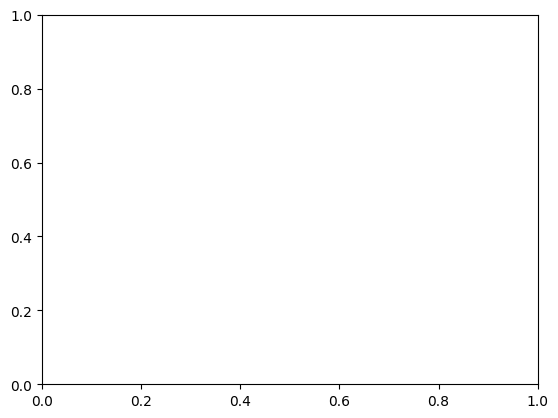

In [81]:
plt.bar(x=steam_games.price.value_counts().index, height=steam_games.price.value_counts().values)
plt.show()

In [61]:
def replace_prices(row):

    try:
        float(row)
    except:
        if 
    

SyntaxError: incomplete input (4136972400.py, line 3)

In [60]:
steam_games.price.unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 2.99, 3.99, 9.99,
       18.99, 29.99, nan, 'Free', 10.99, 1.59, 14.99, 1.99, 59.99, 8.99,
       6.99, 7.99, 39.99, 19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25,
       24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99,
       10.93, 1.39, 'Free HITMAN™ Holiday Pack', 36.99, 4.49, 2.0, 4.0,
       9.0, 234.99, 1.95, 1.5, 199.0, 189.0, 6.66, 27.99, 10.49, 129.99,
       179.0, 26.99, 399.99, 31.99, 399.0, 20.0, 40.0, 3.33, 199.99,
       22.99, 320.0, 38.85, 71.7, 59.95, 995.0, 27.49, 3.39, 6.0, 19.95,
       499.99, 16.06, 4.68, 131